# MATH 210 Introduction to Mathematical Computing

**March 18, 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## 2D Linear Systems

Compute solutions of $\mathbf{x}' = A\mathbf{x}$ where $A$ is a 2 by 2 matrix.

### Example 1

First, let's consider the case $A = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$. This corresponds to the system:

\begin{align*}
x_0' &= x_1 \\
x_1' &= x_0
\end{align*}

In [2]:
A0 = np.array([[0,1],[1,0]])
A1 = np.array([[0,-1],[1,0]])
A2 = np.array([[-1,-1],[1,-1]])

In [3]:
f = lambda x,t: np.array([x[1],x[0]])
x0 = np.array([1,0])
t = np.linspace(0,1,50)
x = spi.odeint(f,x0,t)

The function `odeint` returns a NumPy array. The number of rows is `len(t)` and the number of columns is `len(x0)`.

In [4]:
x.shape

(50, 2)

Look at the first 5 rows. The first row is the vector $(x_0(0),x_1(0)) = (1,0)$.

In [5]:
x[:5,:]

array([[1.        , 0.        ],
       [1.00020825, 0.02040959],
       [1.0008331 , 0.04082768],
       [1.00187481, 0.06126276],
       [1.0033338 , 0.08172336]])

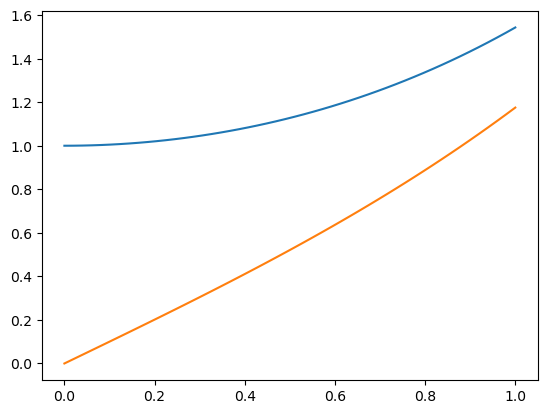

In [6]:
plt.plot(t,x[:,0],label='x_0(t)')
plt.plot(t,x[:,1],label='x_1(t)')
plt.show()

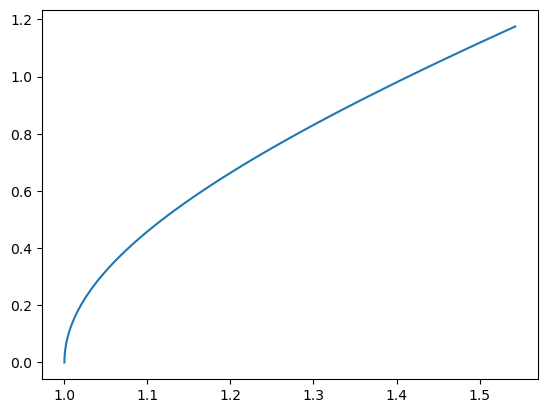

In [7]:
plt.plot(x[:,0],x[:,1])
plt.show()

### Example 2

Consider the case $A = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$. This corresponds to the system:

\begin{align*}
x_0' &= -x_1 \\
x_1' &= x_0
\end{align*}

The eigenvalues of $A$ are $\pm i$ therefore the solution functions $x_0(t)$ and $x_1(t)$ are combinations of $\sin(t)$ and $\cos(t)$.

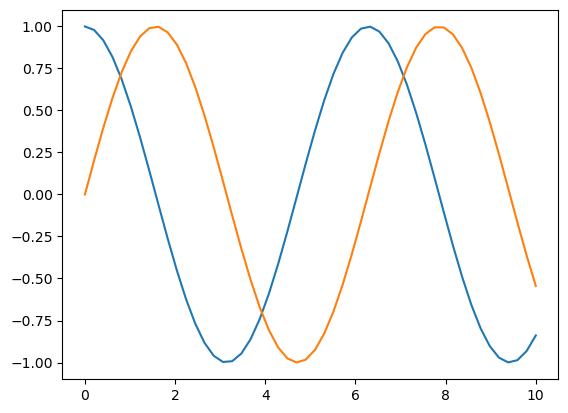

In [8]:
f = lambda x,t: np.array([-x[1],x[0]])
x0 = np.array([1,0])
t = np.linspace(0,10,50)
x = spi.odeint(f,x0,t)
plt.plot(t,x[:,0],label='x_0(t)')
plt.plot(t,x[:,1],label='x_1(t)')
plt.show()

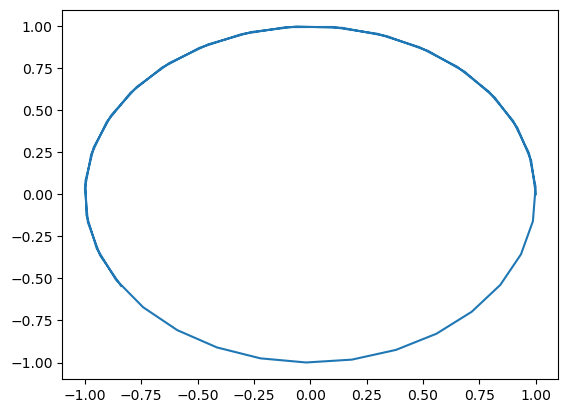

In [9]:
plt.plot(x[:,0],x[:,1])
plt.show()

### Example 3

Consider the case $A = \begin{bmatrix} -1 & -1 \\ 1 & -1 \end{bmatrix}$. This corresponds to the system:

\begin{align*}
x_0' &= -x_0-x_1 \\
x_1' &= x_0-x_1
\end{align*}

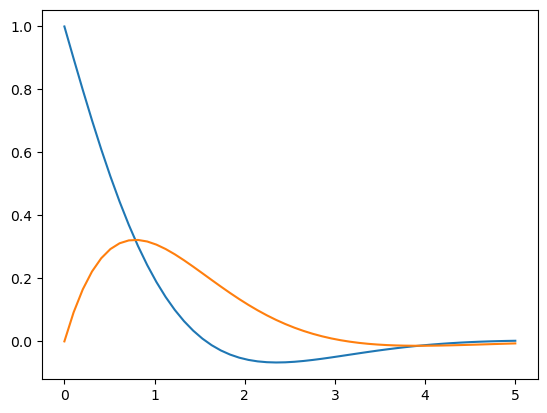

In [10]:
f = lambda x,t: np.array([-x[0]-x[1],x[0]-x[1]])
x0 = np.array([1,0])
t = np.linspace(0,5,50)
x = spi.odeint(f,x0,t)
plt.plot(t,x[:,0],label='x_0(t)')
plt.plot(t,x[:,1],label='x_1(t)')
plt.show()

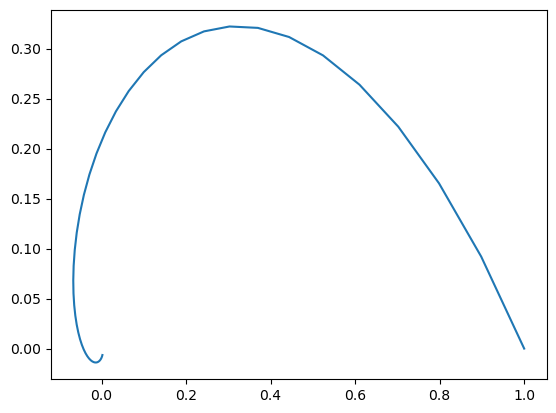

In [11]:
plt.plot(x[:,0],x[:,1])
plt.show()

## 2D Mass Spring Systems

Consider a mass sliding a frictionless surface. The mass is attached to one of a spring and the other end of the spring is fixed at $(0,0)$. Let $k$ be the spring constant, let $m$ be the mass and let $L$ be the unstretched length of the spring. Let $\mathbf{x}(t) = (x(t),y(t))$ be the position of the mass at time $t$. If $\| \mathbf{x}(t) \| = \sqrt{x(t)^2 + y(t)^2} < L$ then the spring is compressed and the spring force acting on the mass is pushing the mass away from the origin. If $\| \mathbf{x}(t) \| > L$ then the spring is stretched and the spring force acting on the mass is pulling the mass towards from the origin.

Newton's law of motion yields the system of equations:

\begin{align*}
mx'' &= \frac{kLx}{\sqrt{x^2 + y^2}} - kx \\
my'' &= \frac{kLy}{\sqrt{x^2 + y^2}} - ky
\end{align*}

Rewrite the system as a first order system. Let $u_0 = x$, $u_1 = x'$, $u_2 = y$ and $u_3 = y'$ and write:

\begin{align*}
u_0' &= u_1 \\
u_1' &= \frac{1}{m} \left( \frac{kLu_0}{\sqrt{u_0^2 + u_2^2}} - ku_0 \right) \\
u_2' &= u_3 \\
u_3' &= \frac{1}{m} \left( \frac{kLu_2}{\sqrt{u_0^2 + u_2^2}} - ku_2 \right) \\
\end{align*}

In [12]:
m = 1; L = 1; k = 1;

def f(u,t):
    dudt = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = 1/m*(k*L*u[0]/np.sqrt(u[0]**2 + u[2]**2) - k*u[0])
    dudt[2] = u[3]
    dudt[3] = 1/m*(k*L*u[2]/np.sqrt(u[0]**2 + u[2]**2) - k*u[2])
    return dudt

In [13]:
f([2,0,3,0],0)

array([ 0.        , -1.4452998 ,  0.        , -2.16794971])

In [14]:
u0 = [2,1,3,5]
t = np.linspace(0,200,2000)
u = spi.odeint(f,u0,t)

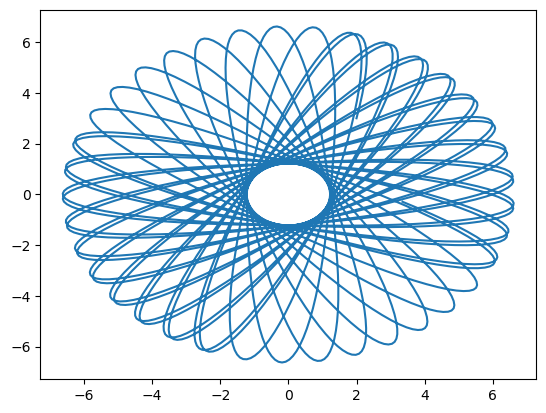

In [15]:
plt.plot(u[:,0],u[:,2])
plt.show()